In [2]:
from linkage.linkage import *
from vineyard import *
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

In [3]:
digits = datasets.load_digits()
data = digits.data
num_samples = data.shape[0]
target = datasets.load_digits().target

We visualize the true labels using t-SNE

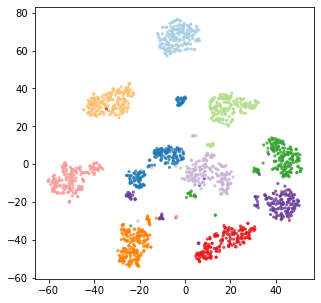

In [14]:
projection = TSNE(random_state=2).fit_transform(data)

color_palette = sns.color_palette("Paired", 10)
cluster_colors = [color_palette[x] for x in datasets.load_digits().target]
plt.figure(figsize=(5,5))
plt.scatter(projection.T[0], projection.T[1], s=10, linewidth=0, c=cluster_colors, alpha=0.8)
plt.show()

Now we cluster the data with gamma-linkage.
In order to choose the parameters, we start by looking at a vineyard.

In [7]:
x = MPSpace(data)
x.fit()

x0 = x.connection_radius()
initial_k = 0.02
final_k = 0.15
N_PARAMETERS = 50

gammas = [ Gamma_curve.linear_interpolator_alpha_s_indexed(k, x0) for k in np.linspace(initial_k, final_k, num=N_PARAMETERS) ]
PDs = [ x.gamma_linkage(curve).PD()[0] for curve in gammas ]

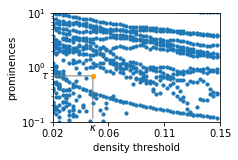

In [10]:
kappa = 0.05
tau = 0.7

plotProminenceVineyard(PDs, N_PARAMETERS, initial_k, final_k, kappa = kappa, tau = tau, s = 10, y_lim = [0.1,10])

Choose k in the 12 cluster gap.
We choose a small k in this gap, because we'll get a larger percentage of points clustered. 

In [11]:
x = MPSpace(data)
x.fit()

gamma = Gamma_curve.linear_interpolator_alpha_s_indexed(kappa, x0)
hc = x.gamma_linkage(gamma)
gamma_labels = hc.persistence_based_flattening(threshold=tau)

Coloring the points by the gamma-linkage labels

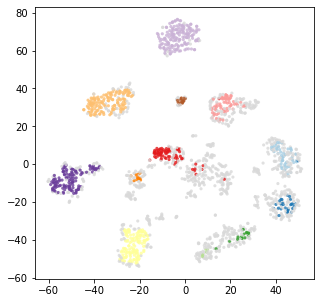

In [13]:

color_palette = sns.color_palette("Paired", 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.85, 0.85, 0.85)
                  for x in gamma_labels[1]]
plt.figure(figsize=(5,5))
plt.scatter(projection.T[0], projection.T[1], s=10, linewidth=0, c=cluster_colors, alpha=0.8)

plt.show()